# Music and mental health - 

Music is a universal experience, often tied to emotions, memories, and well-being. But how does it impact mental health? This project explores the relationship between music listening habits and mental health conditions such as anxiety, depression, insomnia, and OCD.

Using the MXMH (Music & Mental Health) Survey Dataset from Kaggle, which includes self-reported data on music preferences, listening habits, and mental health indicators, we aim to uncover patterns that highlight how different genres, streaming behavior and listening durations correlate with mental well-being.

By analyzing this dataset, we seek to answer questions like:

- Does music positively or negatively affect mental health?
- Are certain genres associated with better or worse mental health outcomes?
- How do streaming habits relate to anxiety, depression, and other conditions?

Through data analysis, visualization, this project provides insights into the deep connection between music and mental well-being, potentially informing music therapy applications and personalized listening recommendations.

### Loading requirement and libraries

In [1]:
!pip install -r requirement.txt

In [2]:
import pandas as pd
from utils import * #utils.py contains the functions to be used in the code

### Loading the data

In [3]:
df = pd.read_csv("mxmh_survey_results.csv")

In [4]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [5]:
inital_exploration(df)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 

#### Checking missing values:

In [6]:
missing_values(df)

Missing Values:


Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

### Cleaning and standardize the data:

In [7]:
standarize_columns(df)

Index(['timestamp', 'age', 'primary_streaming_service', 'hours_per_day',
       'while_working', 'instrumentalist', 'composer', 'fav_genre',
       'exploratory', 'foreign_languages', 'bpm', 'frequency_classical',
       'frequency_country', 'frequency_edm', 'frequency_folk',
       'frequency_gospel', 'frequency_hip_hop', 'frequency_jazz',
       'frequency_k_pop', 'frequency_latin', 'frequency_lofi',
       'frequency_metal', 'frequency_pop', 'frequency_rnb', 'frequency_rap',
       'frequency_rock', 'frequency_video_game_music', 'anxiety', 'depression',
       'insomnia', 'ocd', 'music_effects', 'permissions'],
      dtype='object')

We're going to drop columns that we're not going to use for this project

In [ ]:
columns1 = ['timestamp', 'bpm', 'permissions']
df = df.drop(columns1, axis=1)

Checking missing values again after drop some columns:

In [9]:
missing_values(df)

Missing Values:


age                           1
primary_streaming_service     1
hours_per_day                 0
while_working                 3
instrumentalist               4
composer                      1
fav_genre                     0
exploratory                   0
foreign_languages             4
frequency_classical           0
frequency_country             0
frequency_edm                 0
frequency_folk                0
frequency_gospel              0
frequency_hip_hop             0
frequency_jazz                0
frequency_k_pop               0
frequency_latin               0
frequency_lofi                0
frequency_metal               0
frequency_pop                 0
frequency_rnb                 0
frequency_rap                 0
frequency_rock                0
frequency_video_game_music    0
anxiety                       0
depression                    0
insomnia                      0
ocd                           0
music_effects                 8
dtype: int64

The number of missing values went reduced after drop those columns. We're going to analyze each column and see how we can treat the missing values. 

#### Missing values in "age":

In [10]:
df["age"].dtype

dtype('float64')

In [11]:
df["age"].value_counts()

age
18.0    85
19.0    61
17.0    59
21.0    52
16.0    44
        ..
39.0     1
73.0     1
72.0     1
69.0     1
89.0     1
Name: count, Length: 61, dtype: int64

We're going to use fillna method using the mean of the column to treat the NaNs

In [12]:
df["age"] = df["age"].fillna(df["age"].mean())

"age" column is a float number, we're going to change this to integer numbers

In [ ]:
df["age"] = df["age"].astype(int)

#### Missing values in "music_effects":

In [14]:
df["music_effects"].value_counts()

music_effects
Improve      542
No effect    169
Worsen        17
Name: count, dtype: int64

In this case, we're going to use dropna for the rest of missing values: 

In [15]:
df = df.dropna()

In [16]:
df.isna().sum()

age                           0
primary_streaming_service     0
hours_per_day                 0
while_working                 0
instrumentalist               0
composer                      0
fav_genre                     0
exploratory                   0
foreign_languages             0
frequency_classical           0
frequency_country             0
frequency_edm                 0
frequency_folk                0
frequency_gospel              0
frequency_hip_hop             0
frequency_jazz                0
frequency_k_pop               0
frequency_latin               0
frequency_lofi                0
frequency_metal               0
frequency_pop                 0
frequency_rnb                 0
frequency_rap                 0
frequency_rock                0
frequency_video_game_music    0
anxiety                       0
depression                    0
insomnia                      0
ocd                           0
music_effects                 0
dtype: int64

After the cleaning part, we're going to create a copy:

In [ ]:
df1 = create_copy(df)

In [18]:
df1.shape

(719, 30)

### Distributions

<Axes: xlabel='ocd', ylabel='Count'>

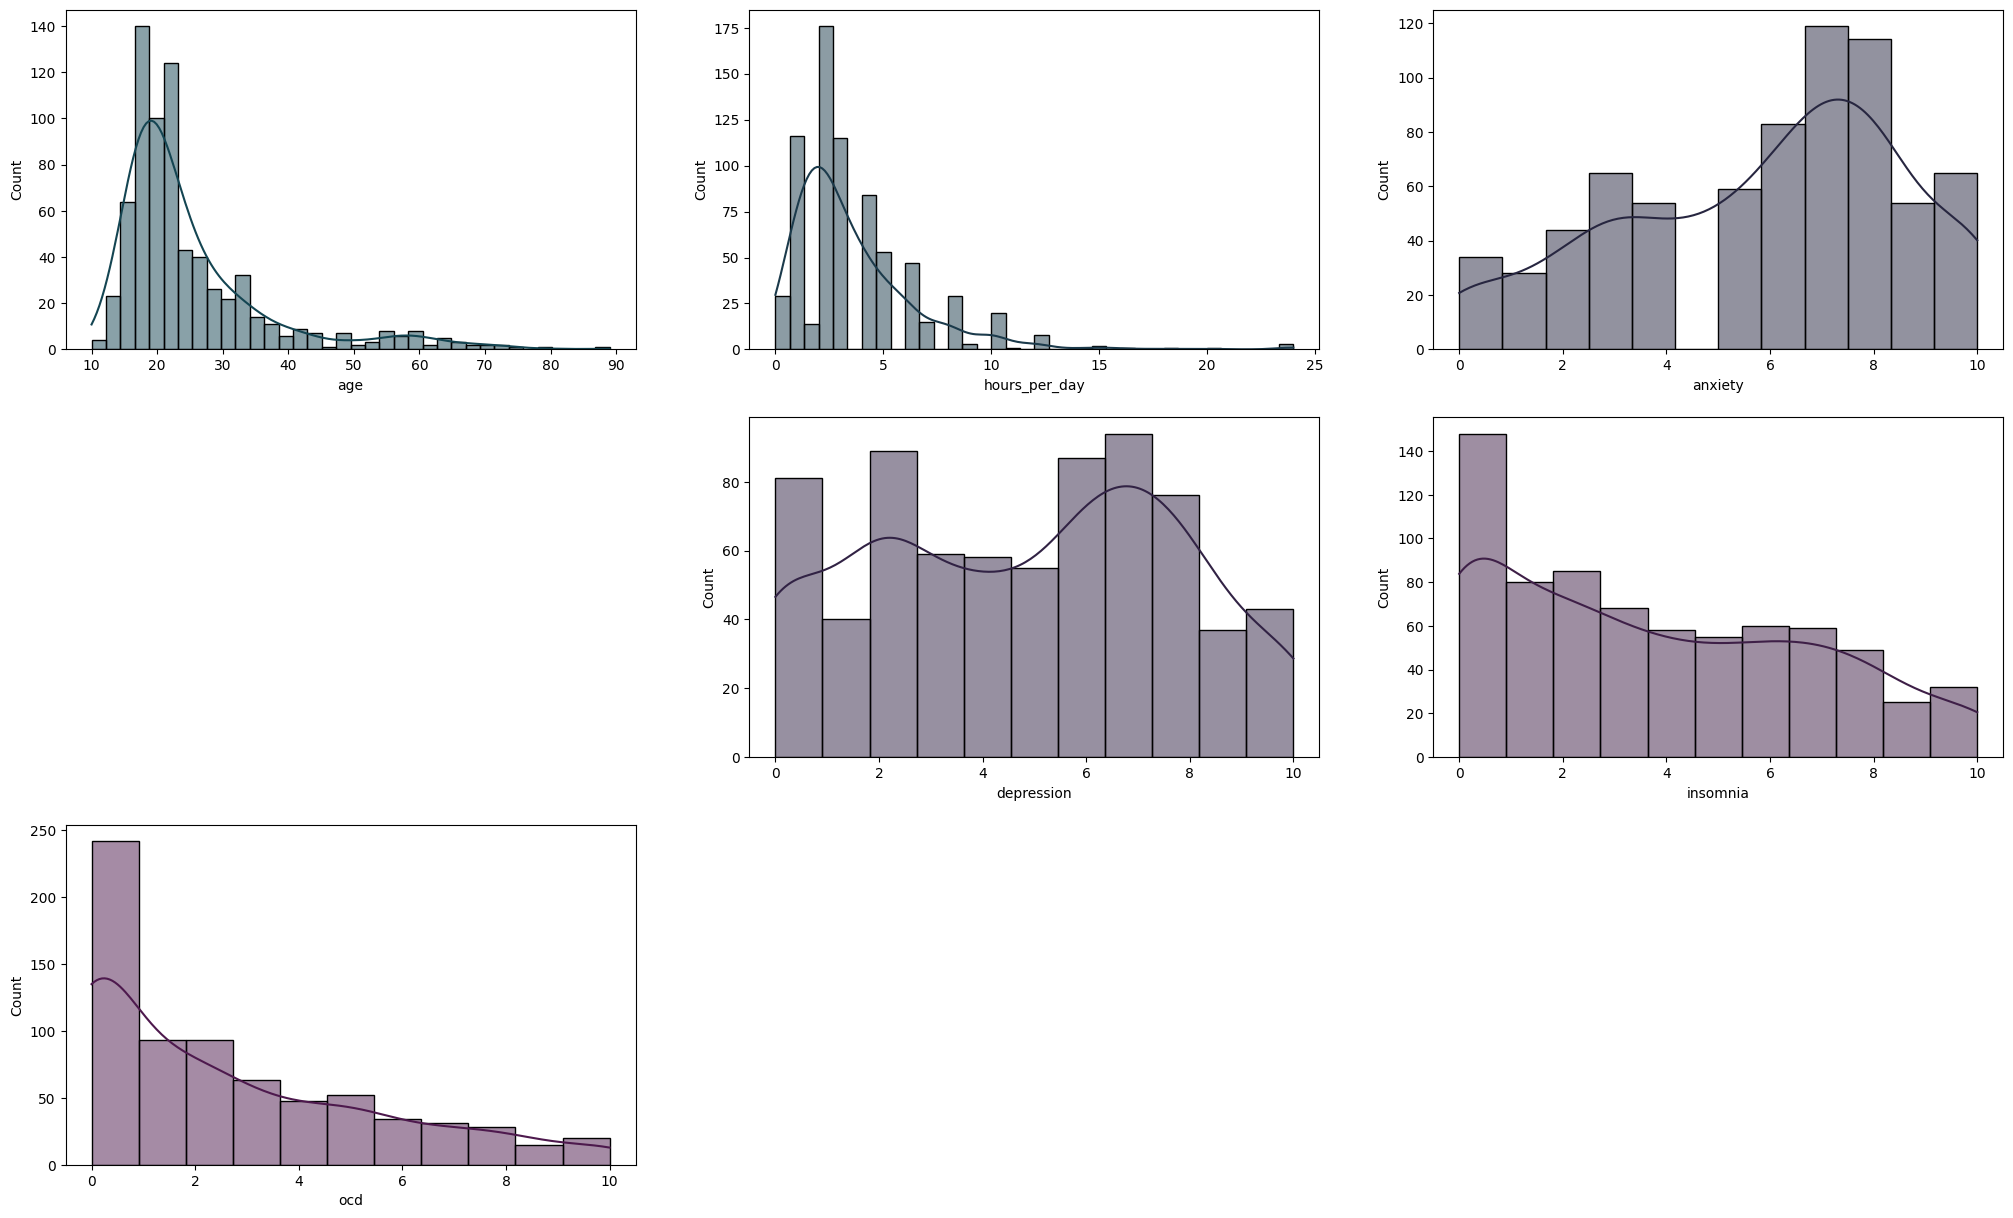

In [19]:
plt.figure(figsize=(25,15))
plt.subplot(3,3,1)
sns.histplot(df['age'],kde=True,color='#144552')
plt.subplot(3,3,2)
sns.histplot(df['hours_per_day'],kde=True,color='#1B3A4B')
plt.subplot(3,3,3)
sns.histplot(df['anxiety'],kde=True,color='#272640')
plt.subplot(3,3,5)
sns.histplot(df['depression'],kde=True,color='#312244')
plt.subplot(3,3,6)
sns.histplot(df['insomnia'],kde=True,color='#3E1F47')
plt.subplot(3,3,7)
sns.histplot(df['ocd'],kde=True,color='#4D194D')

In [20]:
df1["hours_per_day"].mean()

np.float64(3.5772600834492354)

Understanding distribution: 

1. __Age__: Distribution is showing a positive skewness, our data is distribuited towards younger ages, the mean of the sample is 25 years. 
2. __Hours per day (listening music)__: mean 3.57. We also see a positive skewness here, but the distribution is not regular, showing subgroups before and after the mean. 
3. __Anxiety__: Negative skew but also more stable distribution. The sample shows that they experiment medium to high levels of anxiety.
4. __Depression__: Distribution is more uniform in this variable, but more difficult to find a pattern, it seems that the sample has a different levels of depression. 
5. __Insomnia__: The majority of the sample agreed to have low levels of insomnia, but there's a part of the distribution concentrated to high levels of this variable. 
6. __OCD__: Similar position than insomnia variable, but sample in high levels are not representive. 

### Correlations between numerical values

We divided the numerical columns from the categorical ones. 

In [ ]:
cat = df1.select_dtypes(exclude="number")
num = df1.select_dtypes(include="number")

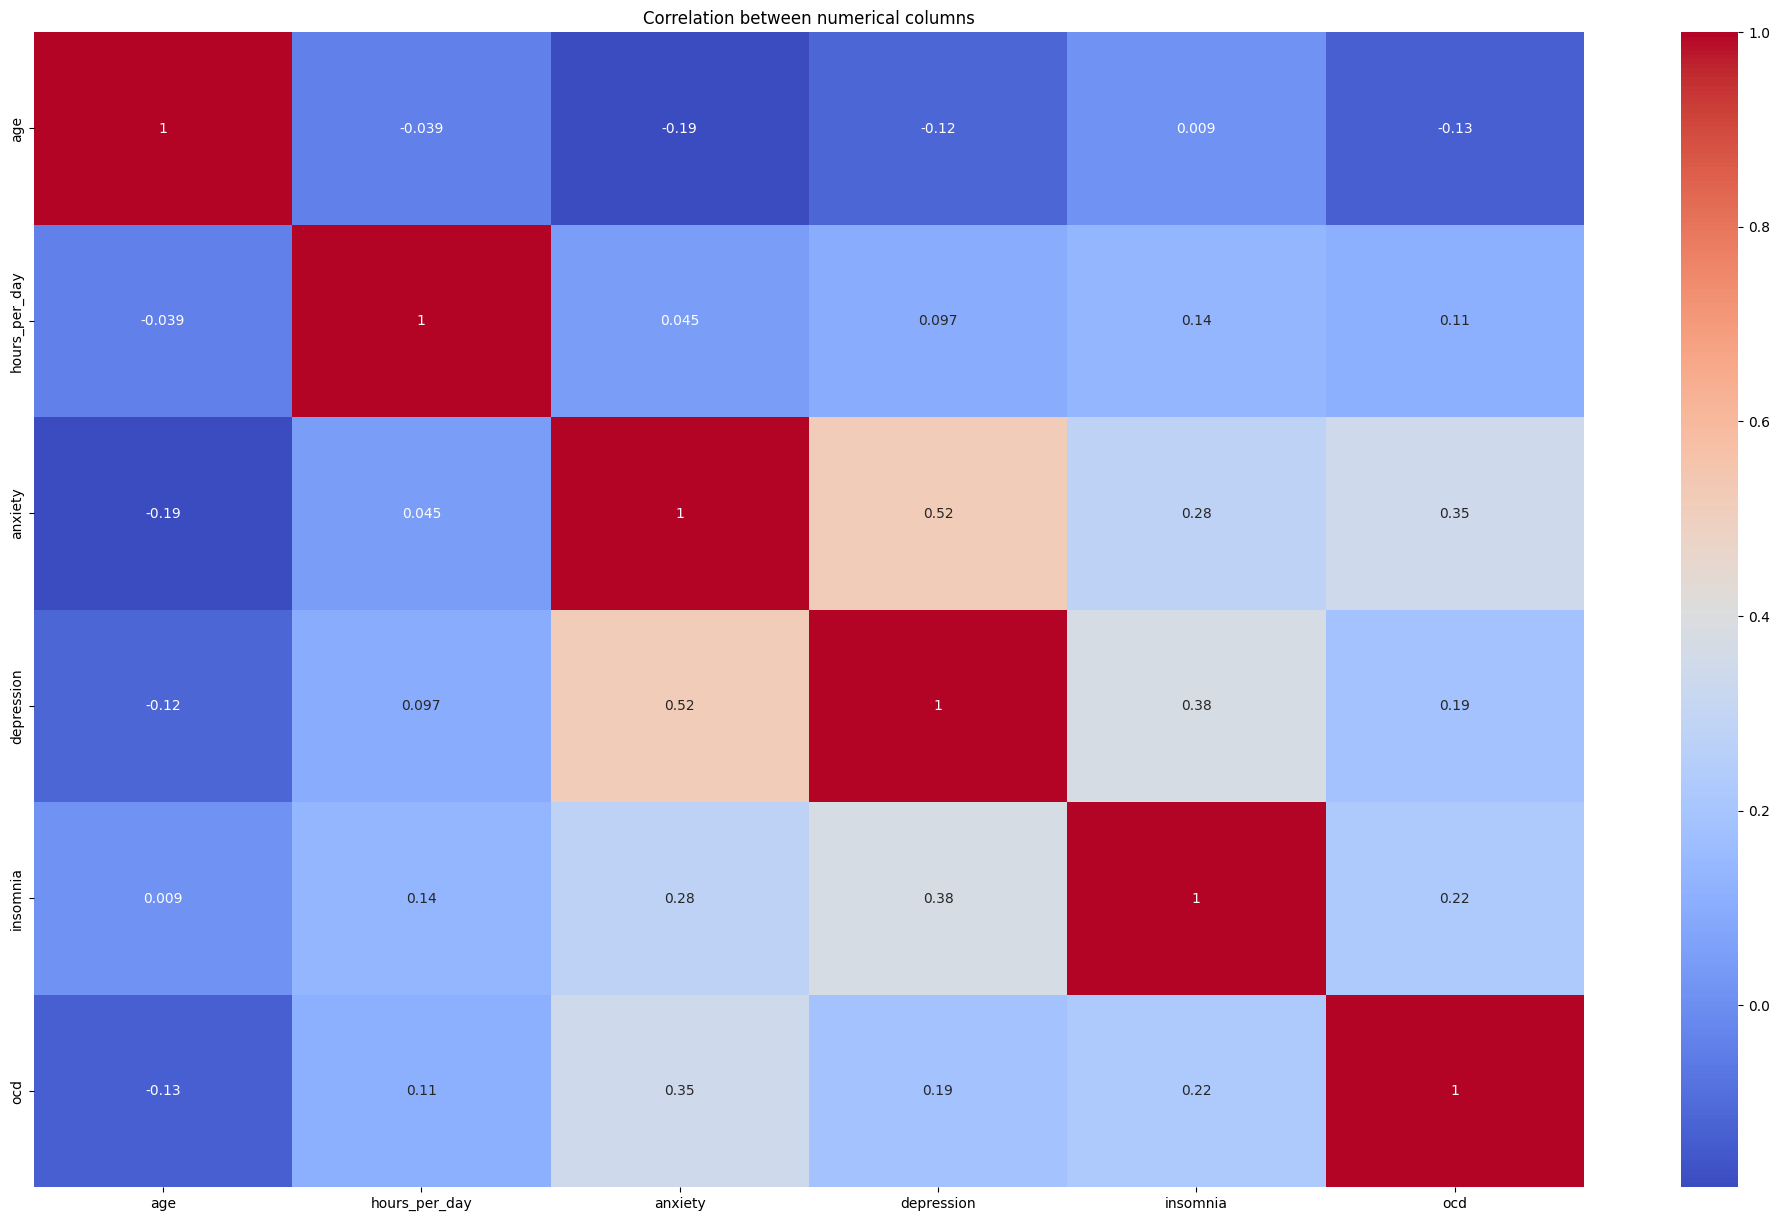

In [22]:
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(25, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(num.corr(), annot=True, cmap="coolwarm")

plt.title("Correlation between numerical columns")
plt.show()

__Analyzing this first look of the correlation on numerical values:__

Strogest Positive Correlations:

__1. Anxiety & Depression__: Moderate to strong correlation, higher levels tento to be associated with higher depression levels.

__2. Depression & Insomnia__: People that experienced depression are more likely to experience insomnia. 

__3. Anxiety & OCD__: Moderate and positive relationship, those who has experienced anxiety may also experience OCD symptoms.

Other variables correlation: 

- Age & Anxiety: It's possible that younger ages might experience higher levels of anxiety. Also for the rests of self-diagnosis, it's also negative which could mean that youngers are more likely to experience other symptoms, but the correlation is weak. 
- Hours per day & Insomnia: Might explain that spending more hours listening to music could be contribute to insomnia.



### Categorical columns

In [ ]:
crosstab_result = pd.crosstab(cat["fav_genre"], cat["music_effects"], normalize="index")

In [24]:
crosstab_result

music_effects,Improve,No effect,Worsen
fav_genre,,,
Classical,0.725490,0.254902,0.019608
Country,0.791667,0.208333,0.000000
EDM,0.833333,0.166667,0.000000
Folk,0.793103,0.206897,0.000000
Gospel,1.000000,0.000000,0.000000
Hip hop,0.885714,0.114286,0.000000
Jazz,0.800000,0.200000,0.000000
K pop,0.809524,0.190476,0.000000
Latin,0.500000,0.500000,0.000000


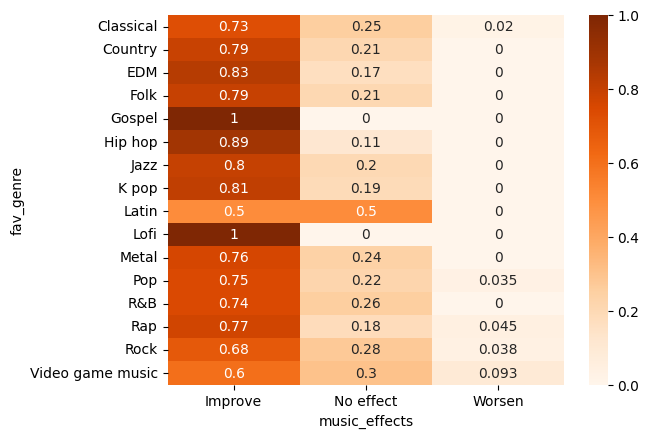

In [25]:
sns.heatmap(crosstab_result, annot=True, cmap="Oranges")
plt.show()

__Analyzing crosstab results__: 

The results are in relative amounts so we can check the impact of music from every favorite music genre. 

__Gospel__ and __Lo-fi__ shows that the number of people that prefers this music genre had feeling that music improves their mental health conditions. 

__Hip Hop__ and __EDM__ has also a high impact into the listeners that prefers this music genres and are agreed that music improves their mental health conditions. 

__Video game music__ and __Latin__ shares the lowest percentage of people who preffers this music genres and agreed that improves their mental health condition. In __Latin__ genre also we can see that the people who chose this as their favorite genre also responds that music has no impact into their mental health condition. 

### Categorical: Chi Square Test - Cramér's V

For that, we're going to change the crosstab result to integers, we worked with percentage for vizualization purposes:

In [ ]:
crosstab_result = pd.crosstab(cat["fav_genre"], cat["music_effects"])

In [27]:
crosstab_result

music_effects,Improve,No effect,Worsen
fav_genre,,,
Classical,37,13,1
Country,19,5,0
EDM,30,6,0
Folk,23,6,0
Gospel,6,0,0
Hip hop,31,4,0
Jazz,16,4,0
K pop,17,4,0
Latin,1,1,0


In [ ]:
from scipy.stats import chi2_contingency

In [153]:
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_result)

In [154]:
print(f"The p-value is: {chi2_pvalue}")

if chi2_pvalue < 0.05:
    print("There is a significant association between favorite genre and music effects.")
else:
    print("There is no significant association between favorite genre and music effects.")

The p-value is: 0.25669723119957305
There is no significant association between favorite genre and music effects.


In [155]:
from scipy.stats.contingency import association

In [156]:
cramers_v = association(crosstab_result, method='cramer')
print(f"Cramér's V: {cramers_v}")

if cramers_v < 0.05:
    print("There is a significant association between favorite genre and music effects.")
    
else:
    print("There is no significant association between favorite genre and music effects.")
    


Cramér's V: 0.15516345536920548
There is no significant association between favorite genre and music effects.


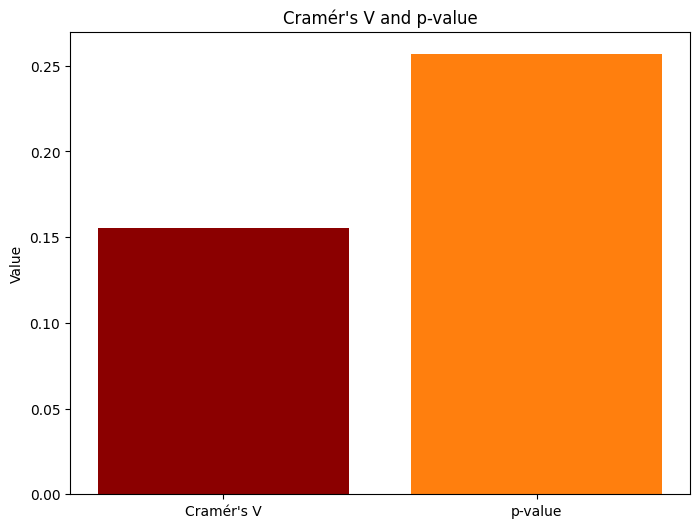

In [157]:
import matplotlib.pyplot as plt

# Data to plot
labels = ['Cramér\'s V', 'p-value']
values = [cramers_v, chi2_pvalue]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['#8b0000', '#ff7f0e'])

# Add title and labels
plt.title('Cramér\'s V and p-value')
plt.ylabel('Value')

# Show the plot
plt.show()

### Modeling Data:

With the purpose of understanding the data better and finding if there's an actual correlation between variables, we're going to change some features, this will help to standardize the data and the responds that we have. 

#### Symptoms:
We want to treat these columns as a categorical to understand not only if the responders experiment these, also to vizualize better in which level they experienced it without having a range of 0 to 10. For that, we changed in three categories: 

- Level 0 - 3 = "Low" as they experienced low levels symptoms of this pathology.
- Level 4 - 7 = "Moderate" as they experienced moderate levels symptoms of this pathology.
- Level 8 - 10 = "High" as they experienced high levels symptoms of this pathology.

In [34]:
df1 = df1.replace([0,1,2,3], "Low")
df1 = df1.replace([4,5,6,7], "Moderate")
df1 = df1.replace([8,9,10], "High")

In [35]:
df1.head()

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,frequency_classical,...,frequency_pop,frequency_rnb,frequency_rap,frequency_rock,frequency_video_game_music,anxiety,depression,insomnia,ocd,music_effects
2,18,Spotify,Moderate,No,No,No,Video game music,No,Yes,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,Moderate,Moderate,High,Low,No effect
3,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,Sometimes,...,Sometimes,Sometimes,Never,Never,Never,High,Moderate,Low,Low,Improve
4,18,Spotify,Moderate,Yes,No,No,R&B,Yes,No,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,Moderate,Low,Moderate,High,Improve
5,18,Spotify,Moderate,Yes,Yes,Yes,Jazz,Yes,Yes,Rarely,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,High,High,Moderate,Moderate,Improve
6,18,YouTube Music,Low,Yes,Yes,No,Video game music,Yes,Yes,Sometimes,...,Rarely,Rarely,Never,Never,Sometimes,Moderate,High,Moderate,Low,Improve


Checking again if these variables, as categorical, has an impact on the dependency on how music impacts on their mental health status.  

In [ ]:
cat = df1.select_dtypes(exclude="number")

In [ ]:
crosstab_result_test = pd.crosstab(cat['ocd'], cat['music_effects'])

In [ ]:
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_result_test)

In [39]:
print(f"The p-value is: {chi2_pvalue}")

if chi2_pvalue < 0.05:
    print("There is a significant association between favorite genre and music effects.")
else:
    print("There is no significant association between favorite genre and music effects.")

The p-value is: 0.9682333319128706
There is no significant association between favorite genre and music effects.


#### Age:

Other variable that we're going to treat is the age. The distribution of this variable contains outliers and it's large to see a pattern between different ages. To simplify the analysis, we created groups of ages that will help us to look better the data we have. This groups are: 

- __Teen__ (10 - 19 years)
- __Young Adult__ (20 - 29 years)
- __Adult__ (30 - 44 years)
- __Middle-aged__ (45 - 59 years)
- __Senior__ (60 - 100 years)

In [40]:
df1.head()

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,frequency_classical,...,frequency_pop,frequency_rnb,frequency_rap,frequency_rock,frequency_video_game_music,anxiety,depression,insomnia,ocd,music_effects
2,18,Spotify,Moderate,No,No,No,Video game music,No,Yes,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,Moderate,Moderate,High,Low,No effect
3,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,Sometimes,...,Sometimes,Sometimes,Never,Never,Never,High,Moderate,Low,Low,Improve
4,18,Spotify,Moderate,Yes,No,No,R&B,Yes,No,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,Moderate,Low,Moderate,High,Improve
5,18,Spotify,Moderate,Yes,Yes,Yes,Jazz,Yes,Yes,Rarely,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,High,High,Moderate,Moderate,Improve
6,18,YouTube Music,Low,Yes,Yes,No,Video game music,Yes,Yes,Sometimes,...,Rarely,Rarely,Never,Never,Sometimes,Moderate,High,Moderate,Low,Improve


In [41]:
df1["age"].replace("High", 30, inplace=True) #replace "High" with 30 - mistake from last changes

/var/folders/zs/_d7261fd7s7690r1zflbt_6h0000gn/T/ipykernel_1641/2852603806.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["age"].replace("High", 30, inplace=True) #replace "High" with 30 - mistake from last changes
/var/folders/zs/_d7261fd7s7690r1zflbt_6h0000gn/T/ipykernel_1641/2852603806.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.s

In [ ]:
bins = [0, 19, 29, 44, 59, 100]  # Ranges
labels = ["Teen", "Young Adult", "Adult", "Middle-aged", "Senior"]

# Create new age category column
df1["age_group"] = pd.cut(df1["age"], bins=bins, labels=labels)

In [43]:
df1.head()

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,frequency_classical,...,frequency_rnb,frequency_rap,frequency_rock,frequency_video_game_music,anxiety,depression,insomnia,ocd,music_effects,age_group
2,18,Spotify,Moderate,No,No,No,Video game music,No,Yes,Never,...,Never,Rarely,Rarely,Very frequently,Moderate,Moderate,High,Low,No effect,Teen
3,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,Sometimes,...,Sometimes,Never,Never,Never,High,Moderate,Low,Low,Improve,Senior
4,18,Spotify,Moderate,Yes,No,No,R&B,Yes,No,Never,...,Very frequently,Very frequently,Never,Rarely,Moderate,Low,Moderate,High,Improve,Teen
5,18,Spotify,Moderate,Yes,Yes,Yes,Jazz,Yes,Yes,Rarely,...,Very frequently,Very frequently,Very frequently,Never,High,High,Moderate,Moderate,Improve,Teen
6,18,YouTube Music,Low,Yes,Yes,No,Video game music,Yes,Yes,Sometimes,...,Rarely,Never,Never,Sometimes,Moderate,High,Moderate,Low,Improve,Teen


#### Frequency of music genres listening: 

Also, other problem that we found in this dataset is how to use the frequency_ columns, this columns shows how much the responders listens different music genres. To simplify the answers, we're going to filter first all the responds by "Very frequently", with this, we want to get two groups: 

- Most active listeners
- Regular listeners

In [44]:
# Filtering columns starting with "frequency_"
frequency_columns = [col for col in df1.columns if col.startswith('frequency_')]

# Create a column of those columns that have a value of "Very frequently"
df1['very_frequently_columns'] = df1[frequency_columns].apply(lambda row: ', '.join(row.index[row == 'Very frequently']), axis=1)

df1.head()

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,frequency_classical,...,frequency_rap,frequency_rock,frequency_video_game_music,anxiety,depression,insomnia,ocd,music_effects,age_group,very_frequently_columns
2,18,Spotify,Moderate,No,No,No,Video game music,No,Yes,Never,...,Rarely,Rarely,Very frequently,Moderate,Moderate,High,Low,No effect,Teen,"frequency_edm, frequency_k_pop, frequency_vide..."
3,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,Sometimes,...,Never,Never,Never,High,Moderate,Low,Low,Improve,Senior,"frequency_jazz, frequency_latin"
4,18,Spotify,Moderate,Yes,No,No,R&B,Yes,No,Never,...,Very frequently,Never,Rarely,Moderate,Low,Moderate,High,Improve,Teen,"frequency_hip_hop, frequency_k_pop, frequency_..."
5,18,Spotify,Moderate,Yes,Yes,Yes,Jazz,Yes,Yes,Rarely,...,Very frequently,Very frequently,Never,High,High,Moderate,Moderate,Improve,Teen,"frequency_jazz, frequency_k_pop, frequency_lof..."
6,18,YouTube Music,Low,Yes,Yes,No,Video game music,Yes,Yes,Sometimes,...,Never,Never,Sometimes,Moderate,High,Moderate,Low,Improve,Teen,


#### Second part of Frequency_ columns. 

To reduce the amount of genres to analyze, I proposed to create a group of similar genres where we can analyze where are the sample located. 

Groups of music genres: 

- __rock_metal__: ["frequency_rock", "frequency_metal"],
- __pop_mainstream__: ["frequency_pop", "frequency_rnb", "frequency_edm", "frequency_k_pop", "frequency_video_game_music"],
-__classical_jazz__: ["frequency_classical", "frequency_jazz"],
- __rap_urbano__: ["frequency_rap", "frequency_hip_hop", "frequency_latin"],
- __otros__: ["frequency_folk", "frequency_country", "frequency_gospel"]


In [45]:
genre_groups = {
    "rock_metal": ["frequency_rock", "frequency_metal"],
    "pop_mainstream": ["frequency_pop", "frequency_rnb", "frequency_edm", "frequency_k_pop", "frequency_video_game_music"],
    "classical_jazz": ["frequency_classical", "frequency_jazz"],
    "rap_urbano": ["frequency_rap", "frequency_hip_hop", "frequency_latin"],
    "otros": ["frequency_folk", "frequency_country", "frequency_gospel"]
}


#Decoding the genres:

for group, genres in genre_groups.items():
    df1[group] = df1["very_frequently_columns"].fillna("").apply(
        lambda x: int(any(genre in x for genre in genres))
    )

In [46]:
df1.head()

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,frequency_classical,...,insomnia,ocd,music_effects,age_group,very_frequently_columns,rock_metal,pop_mainstream,classical_jazz,rap_urbano,otros
2,18,Spotify,Moderate,No,No,No,Video game music,No,Yes,Never,...,High,Low,No effect,Teen,"frequency_edm, frequency_k_pop, frequency_vide...",0,1,0,0,0
3,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,Sometimes,...,Low,Low,Improve,Senior,"frequency_jazz, frequency_latin",0,0,1,1,0
4,18,Spotify,Moderate,Yes,No,No,R&B,Yes,No,Never,...,Moderate,High,Improve,Teen,"frequency_hip_hop, frequency_k_pop, frequency_...",0,1,0,1,0
5,18,Spotify,Moderate,Yes,Yes,Yes,Jazz,Yes,Yes,Rarely,...,Moderate,Moderate,Improve,Teen,"frequency_jazz, frequency_k_pop, frequency_lof...",1,1,1,1,0
6,18,YouTube Music,Low,Yes,Yes,No,Video game music,Yes,Yes,Sometimes,...,Moderate,Low,Improve,Teen,,0,0,0,0,0


In [47]:
df1["most_active_listeners"] = df1[["rock_metal", "pop_mainstream", "classical_jazz", "rap_urbano", "otros"]].sum(axis=1).apply(lambda x: "most active listeners" if x >= 2 else "regular listeners")


In [48]:
df1["most_active_listeners"].value_counts() 

most_active_listeners
most active listeners    376
regular listeners        343
Name: count, dtype: int64

#### Mental Health Status Clasification: 

As we did with the frequencies, working with the columns related with the symptoms of different mental health pathologies it's also needed to see if we can find any correlation with other variables. 

In this case, we're going to transform this columns first to a score, decoding the level of this symptoms that we already treated before into numerical again: 

- Low : 1
- Moderate: 2
- High: 3


In [49]:
mental_health_mapping = {"Low": 1, "Moderate": 2, "High": 3}

df1["anxiety_score"] = df1["anxiety"].map(mental_health_mapping)
df1["insomnia_score"] = df1["insomnia"].map(mental_health_mapping)
df1["ocd_score"] = df1["ocd"].map(mental_health_mapping)
df1["depression_score"] = df1["depression"].map(mental_health_mapping)

#### Second part of MH Status Clasification: 

Once we change this variables to numbers, we're going to select it and add a column with the name of "classification" where we divide this sample in two groups: 

- Low risk: Those responders who didn't experienced the symptomps in a moderate or high level before.
- High risk: Those responders who experienced symptoms in a moderate or high level. 



In [130]:
columns_score = ['anxiety_score', 'insomnia_score', 'ocd_score', 'depression_score']

In [51]:
columns_with_2_or_3 = df1[columns_score].apply(lambda x: (x >= 2) & (x <= 3), axis=1).sum(axis=1)
df1["classification"] = df1.apply(lambda row: "High risk" if columns_with_2_or_3[row.name] >= 3 else "Low risk", axis=1)

In [52]:
df1["classification"].value_counts()

classification
Low risk     400
High risk    319
Name: count, dtype: int64

Now that we have two groups, to test again correlations, we're going to change this into numerical:

In [53]:
classification_map = {
    "Low risk": 1,
    "High risk": 2
    
}

df1["classification"] = df1["classification"].replace(classification_map)
df1.head()

/var/folders/zs/_d7261fd7s7690r1zflbt_6h0000gn/T/ipykernel_1641/4254760886.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["classification"] = df1["classification"].replace(classification_map)


,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,frequency_classical,...,pop_mainstream,classical_jazz,rap_urbano,otros,most_active_listeners,anxiety_score,insomnia_score,ocd_score,depression_score,classification
2,18,Spotify,Moderate,No,No,No,Video game music,No,Yes,Never,...,1,0,0,0,regular listeners,2.0,3.0,1.0,2.0,2
3,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,Sometimes,...,0,1,1,0,most active listeners,3.0,1.0,1.0,2.0,1
4,18,Spotify,Moderate,Yes,No,No,R&B,Yes,No,Never,...,1,0,1,0,most active listeners,2.0,2.0,3.0,1.0,2
5,18,Spotify,Moderate,Yes,Yes,Yes,Jazz,Yes,Yes,Rarely,...,1,1,1,0,most active listeners,3.0,2.0,2.0,3.0,2
6,18,YouTube Music,Low,Yes,Yes,No,Video game music,Yes,Yes,Sometimes,...,0,0,0,0,regular listeners,2.0,2.0,1.0,3.0,2


### Categorical: Chi Square Test - Cramér's V (2nd part)

Once we finished to do changes, we're trying again Chi Square Test and see if with the changes we did we're able to reject the null hypothesis. 


In [135]:

contingency_table2 = pd.crosstab(df1["most_active_listeners"], df1["classification"])

chi2_stats, chi2_pvalue, _, _ = chi2_contingency(contingency_table2)

In [136]:
print(f"The p-value is: {chi2_pvalue}")

if chi2_pvalue < 0.05:
    print("There is a significant association between favorite genre and music effects.")
else:
    print("There is no significant association between favorite genre and music effects.")

The p-value is: 0.018450911039194027
There is a significant association between favorite genre and music effects.


In [139]:
chi1= chi2_pvalue

In [137]:
cramers_v = association(contingency_table2, method='cramer')
print(f"Cramér's V: {cramers_v}")

if cramers_v < 0.05:
    print("There is a significant association between favorite genre and music effects.")
    
else:
    print("There is no significant association between favorite genre and music effects.")
    

Cramér's V: 0.09068290170987349
There is no significant association between favorite genre and music effects.


In [140]:
cra1= cramers_v

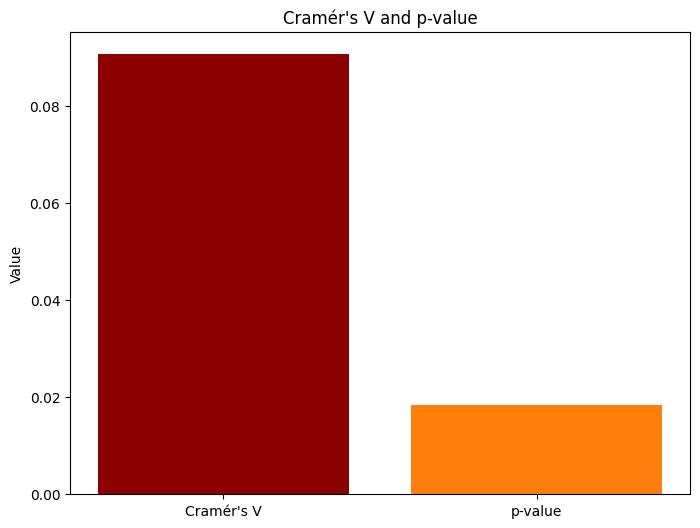

In [144]:
# Data to plot
labels = ['Cramér\'s V', 'p-value']
values = [cra1, chi1]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['#8b0000', '#ff7f0e'])

# Add title and labels
plt.title('Cramér\'s V and p-value')
plt.ylabel('Value')

# Show the plot
plt.show()

In [147]:

contingency_table3 = pd.crosstab(df1["music_effects"], df1["classification"])

chi2_stats, chi2_pvalue, _, _ = chi2_contingency(contingency_table3)

In [148]:
print(f"The p-value is: {chi2_pvalue}")

if chi2_pvalue < 0.05:
    print("There is a significant association between favorite genre and music effects.")
else:
    print("There is no significant association between favorite genre and music effects.")

The p-value is: 0.04665946746749622
There is a significant association between favorite genre and music effects.


In [149]:
chi2= chi2_pvalue

In [150]:
cramers_v = association(contingency_table3, method='cramer')
print(f"Cramér's V: {cramers_v}")

if cramers_v < 0.05:
    print("There is a significant association between favorite genre and music effects.")
    
else:
    print("There is no significant association between favorite genre and music effects.")
    

Cramér's V: 0.09233306442331649
There is no significant association between favorite genre and music effects.


In [151]:
cra2 = cramers_v

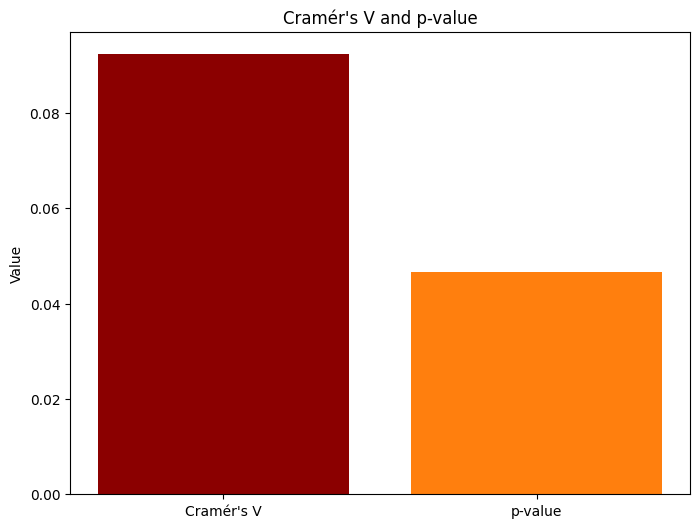

In [152]:
# Data to plot
labels = ['Cramér\'s V', 'p-value']
values = [cra2, chi2]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['#8b0000', '#ff7f0e'])

# Add title and labels
plt.title('Cramér\'s V and p-value')
plt.ylabel('Value')

# Show the plot
plt.show()

### Correlation: 2nd part

In [76]:
df1.head()

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,frequency_classical,...,pop_mainstream,classical_jazz,rap_urbano,otros,most_active_listeners,anxiety_score,insomnia_score,ocd_score,depression_score,classification
2,18,Spotify,Moderate,No,No,No,Video game music,No,Yes,Never,...,1,0,0,0,regular listeners,2.0,3.0,1.0,2.0,2
3,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,Sometimes,...,0,1,1,0,most active listeners,3.0,1.0,1.0,2.0,1
4,18,Spotify,Moderate,Yes,No,No,R&B,Yes,No,Never,...,1,0,1,0,most active listeners,2.0,2.0,3.0,1.0,2
5,18,Spotify,Moderate,Yes,Yes,Yes,Jazz,Yes,Yes,Rarely,...,1,1,1,0,most active listeners,3.0,2.0,2.0,3.0,2
6,18,YouTube Music,Low,Yes,Yes,No,Video game music,Yes,Yes,Sometimes,...,0,0,0,0,regular listeners,2.0,2.0,1.0,3.0,2


For correlation purposes we need to change variables into numbers.

In [77]:
most_active_map = {
    'regular listeners': 1,
    'most active listeners': 2
    
}

df1['most_active_listeners'] = df1['most_active_listeners'].replace(most_active_map)
df1.head()

/var/folders/zs/_d7261fd7s7690r1zflbt_6h0000gn/T/ipykernel_1641/2512460192.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['most_active_listeners'] = df1['most_active_listeners'].replace(most_active_map)


,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,frequency_classical,...,pop_mainstream,classical_jazz,rap_urbano,otros,most_active_listeners,anxiety_score,insomnia_score,ocd_score,depression_score,classification
2,18,Spotify,Moderate,No,No,No,Video game music,No,Yes,Never,...,1,0,0,0,1,2.0,3.0,1.0,2.0,2
3,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,Sometimes,...,0,1,1,0,2,3.0,1.0,1.0,2.0,1
4,18,Spotify,Moderate,Yes,No,No,R&B,Yes,No,Never,...,1,0,1,0,2,2.0,2.0,3.0,1.0,2
5,18,Spotify,Moderate,Yes,Yes,Yes,Jazz,Yes,Yes,Rarely,...,1,1,1,0,2,3.0,2.0,2.0,3.0,2
6,18,YouTube Music,Low,Yes,Yes,No,Video game music,Yes,Yes,Sometimes,...,0,0,0,0,1,2.0,2.0,1.0,3.0,2


In [78]:
music_effects_mapping = {
    'No effect': 1,
    'Improve': 2,
    'Worsen': 3
    
}

df1['music_effects'] = df1['music_effects'].replace(music_effects_mapping)
df1.head()

/var/folders/zs/_d7261fd7s7690r1zflbt_6h0000gn/T/ipykernel_1641/2191037280.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['music_effects'] = df1['music_effects'].replace(music_effects_mapping)


,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,frequency_classical,...,pop_mainstream,classical_jazz,rap_urbano,otros,most_active_listeners,anxiety_score,insomnia_score,ocd_score,depression_score,classification
2,18,Spotify,Moderate,No,No,No,Video game music,No,Yes,Never,...,1,0,0,0,1,2.0,3.0,1.0,2.0,2
3,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,Sometimes,...,0,1,1,0,2,3.0,1.0,1.0,2.0,1
4,18,Spotify,Moderate,Yes,No,No,R&B,Yes,No,Never,...,1,0,1,0,2,2.0,2.0,3.0,1.0,2
5,18,Spotify,Moderate,Yes,Yes,Yes,Jazz,Yes,Yes,Rarely,...,1,1,1,0,2,3.0,2.0,2.0,3.0,2
6,18,YouTube Music,Low,Yes,Yes,No,Video game music,Yes,Yes,Sometimes,...,0,0,0,0,1,2.0,2.0,1.0,3.0,2


In [79]:
age_group_mapping = {
    'Teen': 1,
    'Young Adult': 2,
    'Adult': 3,
    'Middle-aged': 4,
    'Senior': 5
}

df1['age_group'] = df1['age_group'].replace(age_group_mapping)
df1.head()

/var/folders/zs/_d7261fd7s7690r1zflbt_6h0000gn/T/ipykernel_1641/1999425962.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['age_group'] = df1['age_group'].replace(age_group_mapping)
/var/folders/zs/_d7261fd7s7690r1zflbt_6h0000gn/T/ipykernel_1641/1999425962.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df1['age_group'] = df1['age_group'].replace(age_group_mapping)


,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,frequency_classical,...,pop_mainstream,classical_jazz,rap_urbano,otros,most_active_listeners,anxiety_score,insomnia_score,ocd_score,depression_score,classification
2,18,Spotify,Moderate,No,No,No,Video game music,No,Yes,Never,...,1,0,0,0,1,2.0,3.0,1.0,2.0,2
3,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,Sometimes,...,0,1,1,0,2,3.0,1.0,1.0,2.0,1
4,18,Spotify,Moderate,Yes,No,No,R&B,Yes,No,Never,...,1,0,1,0,2,2.0,2.0,3.0,1.0,2
5,18,Spotify,Moderate,Yes,Yes,Yes,Jazz,Yes,Yes,Rarely,...,1,1,1,0,2,3.0,2.0,2.0,3.0,2
6,18,YouTube Music,Low,Yes,Yes,No,Video game music,Yes,Yes,Sometimes,...,0,0,0,0,1,2.0,2.0,1.0,3.0,2


In [93]:
df_num = df1[["music_effects", "most_active_listeners", "age_group", "classification"]]

In [94]:
df_num.corr()

,music_effects,most_active_listeners,age_group,classification
music_effects,1.000000,0.011619,-0.073274,0.091944
most_active_listeners,0.011619,1.000000,-0.116822,0.090683
age_group,-0.073274,-0.116822,1.000000,-0.065617
classification,0.091944,0.090683,-0.065617,1.000000


In [99]:
df_num["music_effects"].corr(df_num["classification"], method="spearman")

np.float64(0.09118848163810801)

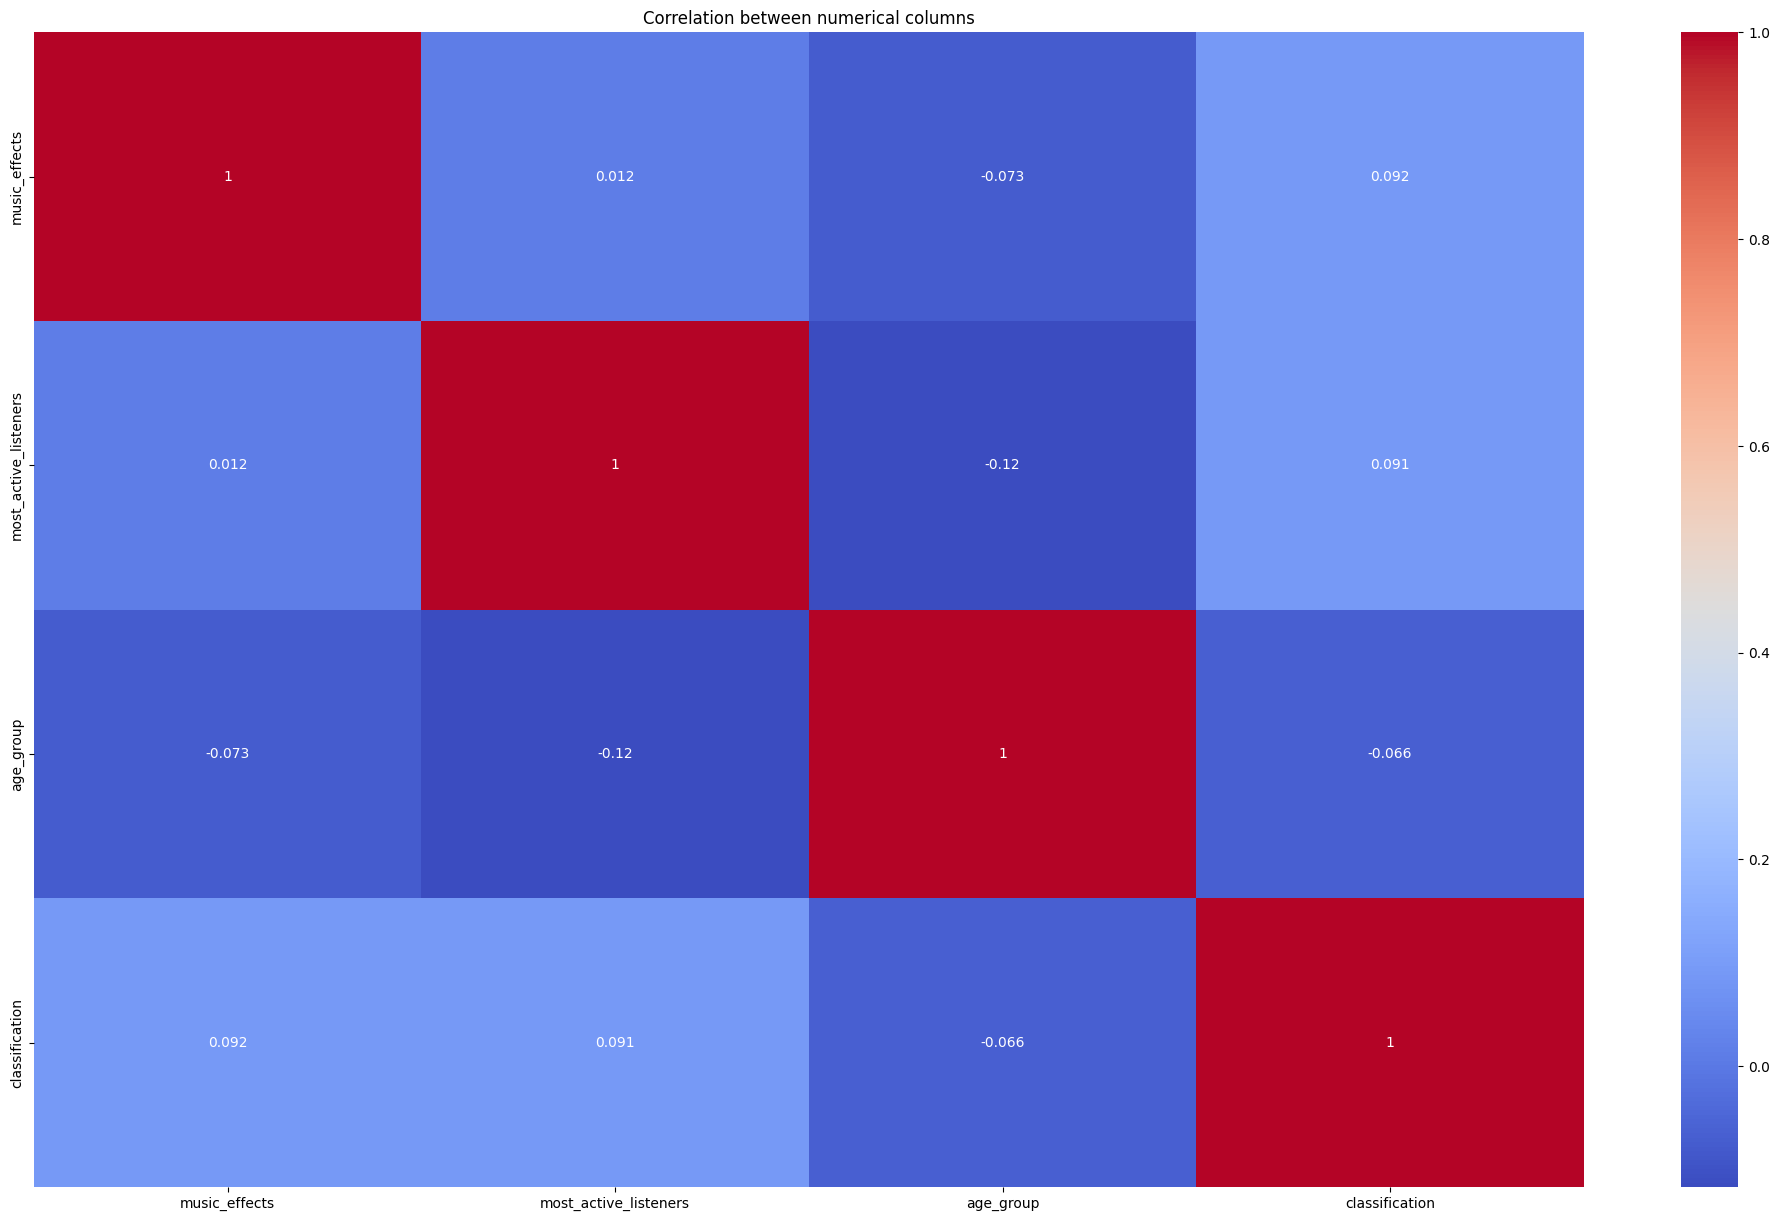

In [138]:
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(25, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm")

plt.title("Correlation between numerical columns")
plt.show()

### Other visualizations we use for the presentation

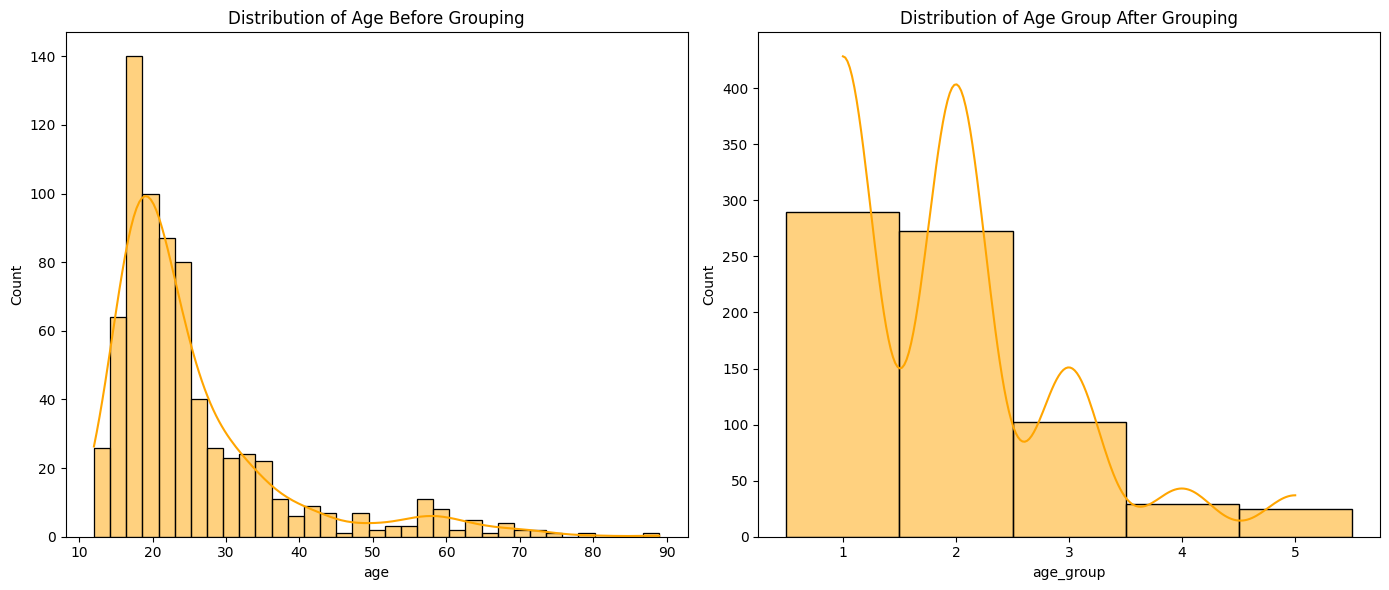

In [126]:
import seaborn as sns

import matplotlib.pyplot as plt

# Setting up the matplotlib figure with an appropriate size
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the distribution of age
sns.histplot(df1['age'], kde=True, color='orange', ax=axes[0])
axes[0].set_title('Distribution of Age Before Grouping')
axes[0].set_xlabel('age')
axes[0].set_ylabel('Count')

# Plotting the distribution of age_group
sns.histplot(df1['age_group'], kde=True, color='orange', ax=axes[1])
axes[1].set_title('Distribution of Age Group After Grouping')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

/var/folders/zs/_d7261fd7s7690r1zflbt_6h0000gn/T/ipykernel_1641/336646088.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df1[col], order=df1[col].value_counts().index, palette='Oranges')
/var/folders/zs/_d7261fd7s7690r1zflbt_6h0000gn/T/ipykernel_1641/336646088.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df1[col], order=df1[col].value_counts().index, palette='Oranges')
/var/folders/zs/_d7261fd7s7690r1zflbt_6h0000gn/T/ipykernel_1641/336646088.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df1[col], order=df1[col].

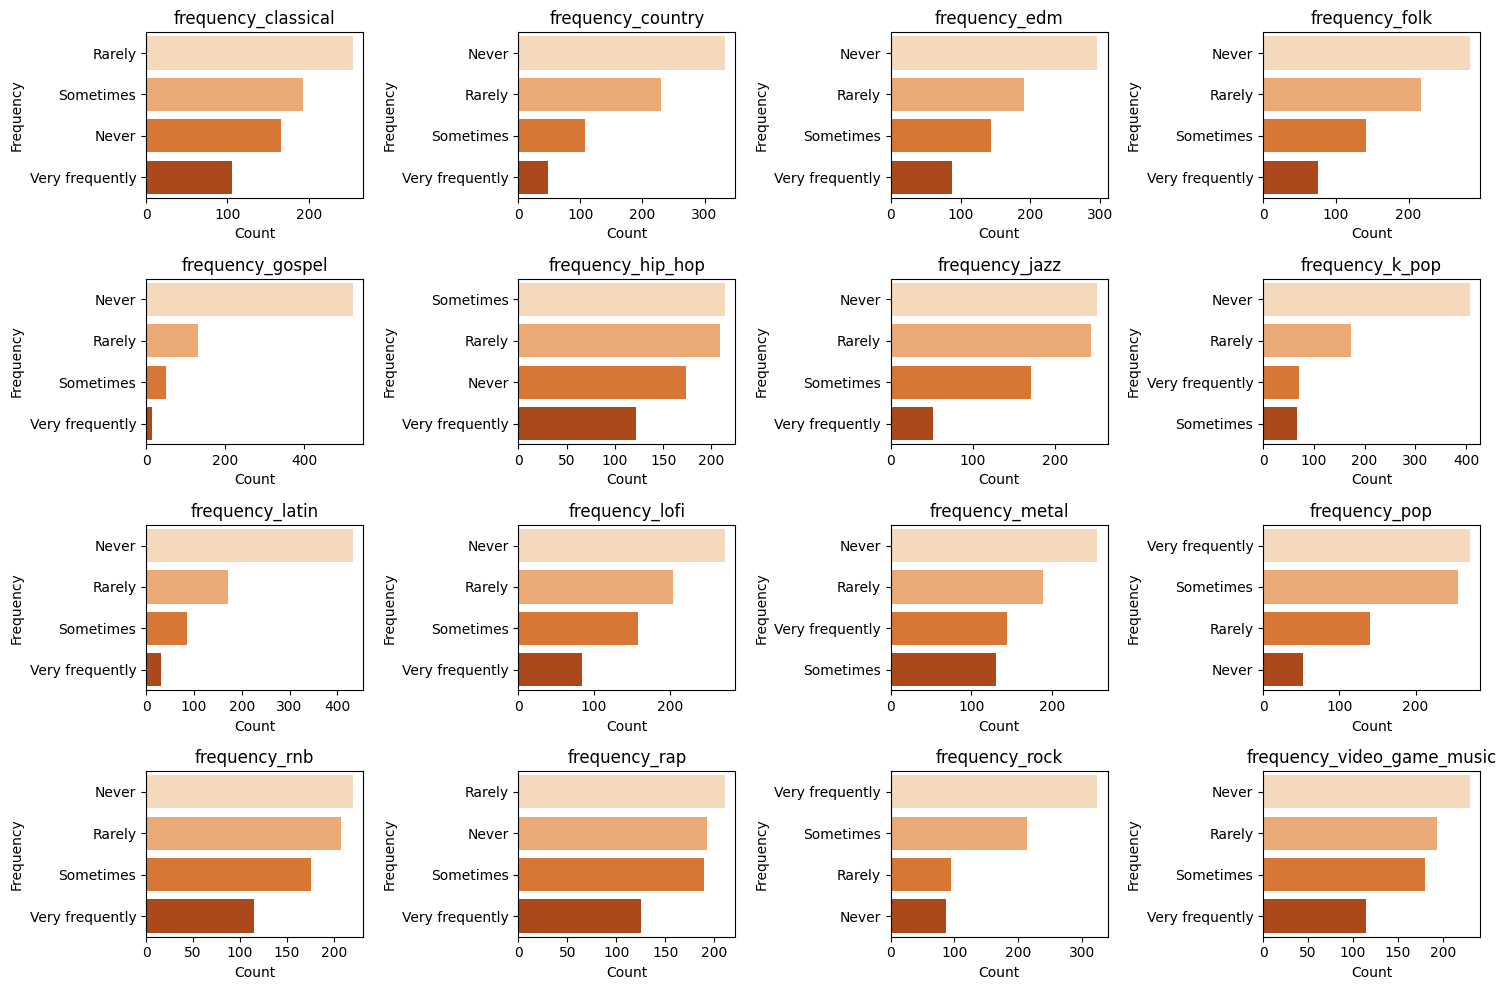

/var/folders/zs/_d7261fd7s7690r1zflbt_6h0000gn/T/ipykernel_1641/336646088.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df1['most_active_listeners'], order=df1['most_active_listeners'].value_counts().index, palette='Oranges')


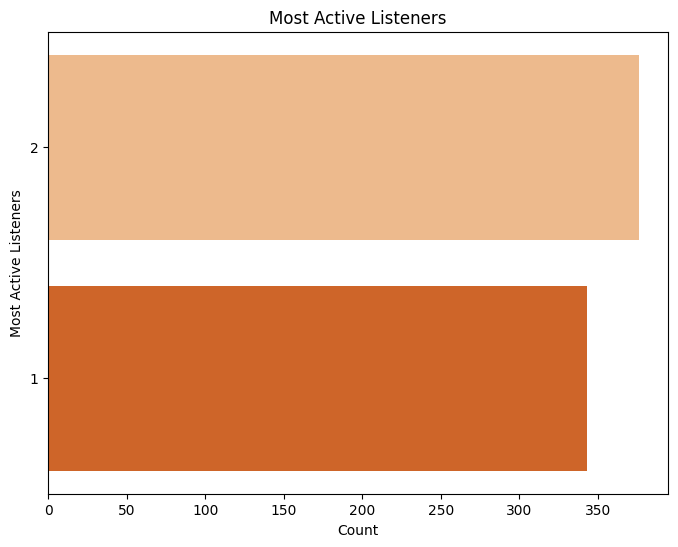

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plotting the distribution of frequency columns before transformation
plt.figure(figsize=(15, 10))
for i, col in enumerate(frequency_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(y=df1[col], order=df1[col].value_counts().index, palette='Oranges')
    plt.title(col)
    plt.xlabel('Count')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plotting the distribution of most_active_listeners after transformation
plt.figure(figsize=(8, 6))
sns.countplot(y=df1['most_active_listeners'], order=df1['most_active_listeners'].value_counts().index, palette='Oranges')
plt.title('Most Active Listeners')
plt.xlabel('Count')
plt.ylabel('Most Active Listeners')
plt.show()

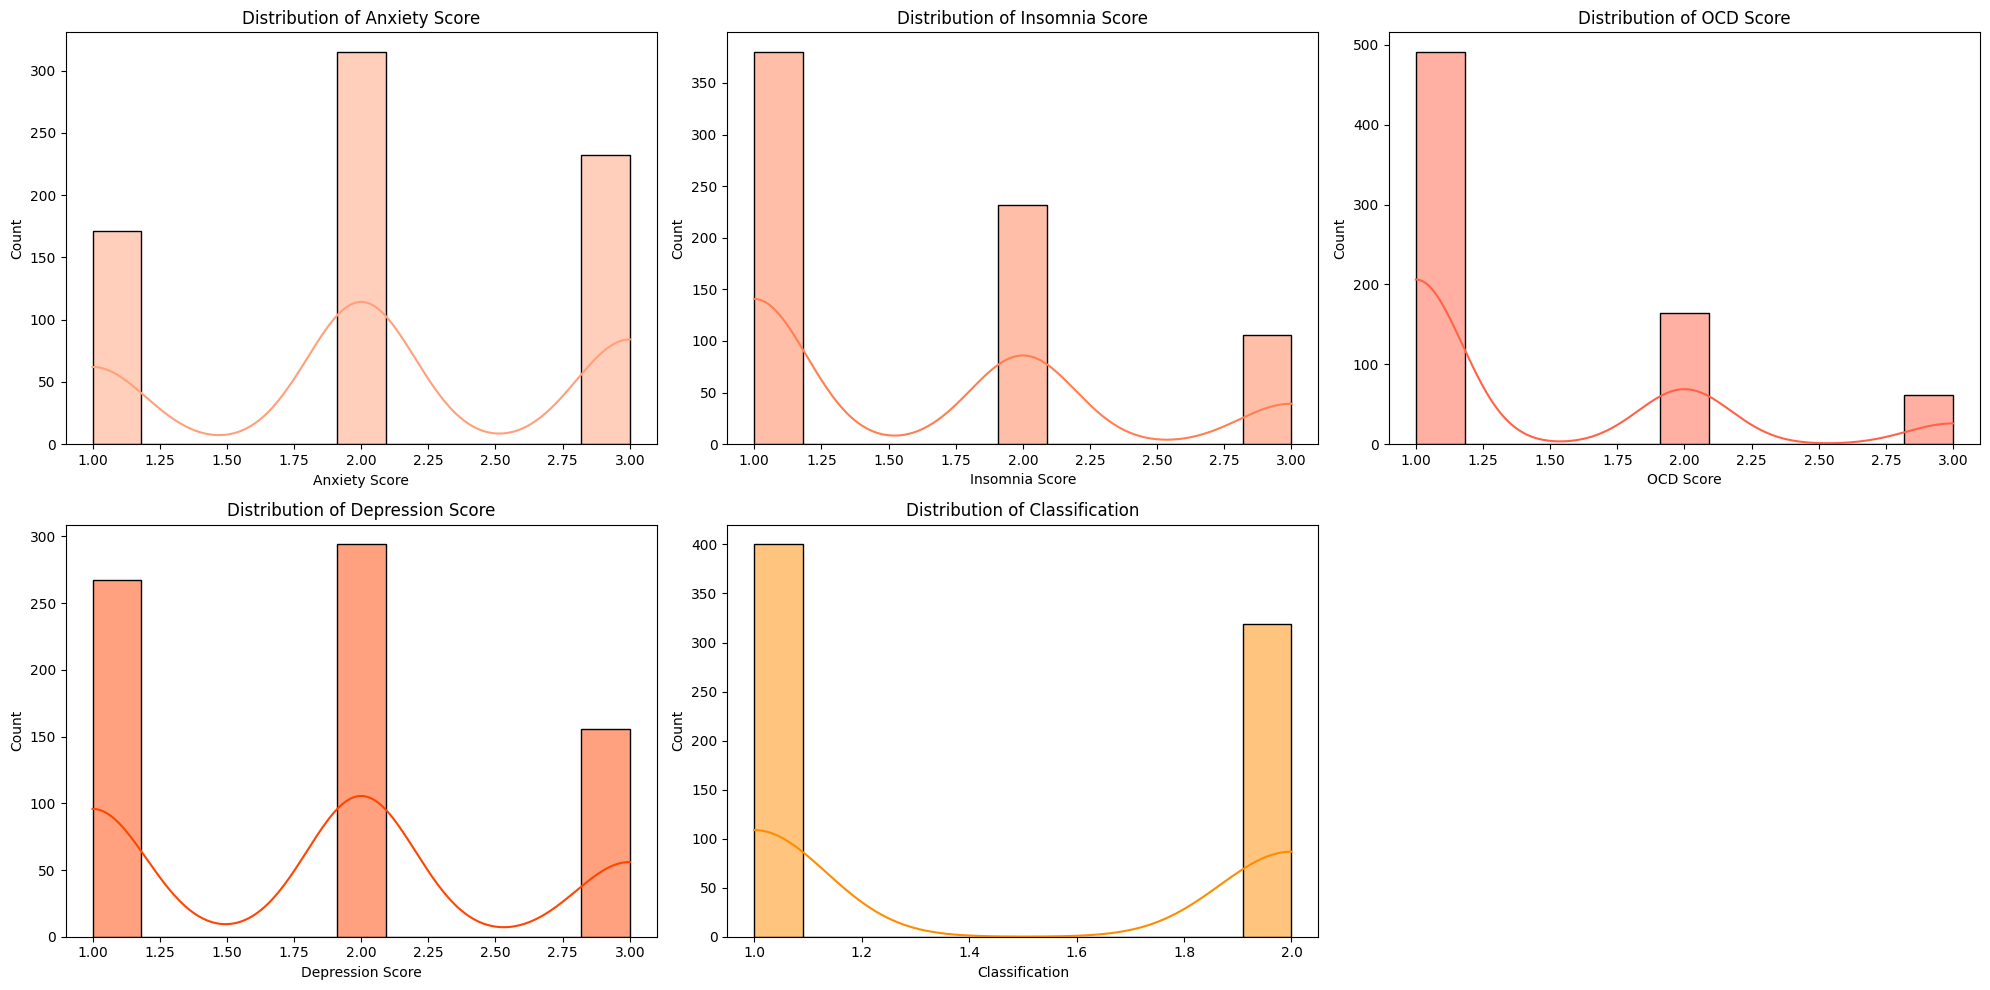

In [129]:
import seaborn as sns

import matplotlib.pyplot as plt

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(20, 10))

# Plotting the distribution of anxiety_score
plt.subplot(2, 3, 1)
sns.histplot(df1['anxiety_score'], kde=True, color='#FFA07A')
plt.title('Distribution of Anxiety Score')
plt.xlabel('Anxiety Score')
plt.ylabel('Count')

# Plotting the distribution of insomnia_score
plt.subplot(2, 3, 2)
sns.histplot(df1['insomnia_score'], kde=True, color='#FF7F50')
plt.title('Distribution of Insomnia Score')
plt.xlabel('Insomnia Score')
plt.ylabel('Count')

# Plotting the distribution of ocd_score
plt.subplot(2, 3, 3)
sns.histplot(df1['ocd_score'], kde=True, color='#FF6347')
plt.title('Distribution of OCD Score')
plt.xlabel('OCD Score')
plt.ylabel('Count')

# Plotting the distribution of depression_score
plt.subplot(2, 3, 4)
sns.histplot(df1['depression_score'], kde=True, color='#FF4500')
plt.title('Distribution of Depression Score')
plt.xlabel('Depression Score')
plt.ylabel('Count')

# Plotting the distribution of classification
plt.subplot(2, 3, 5)
sns.histplot(df1['classification'], kde=True, color='#FF8C00')
plt.title('Distribution of Classification')
plt.xlabel('Classification')
plt.ylabel('Count')

plt.tight_layout()
plt.show()